In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#This is just whats ready locally on my machine
df =  pd.read_csv('C:/Users/farha/Desktop/uni stage 3/Introduction to AI/COURSEWORK/Github/intro-to-ai-farhan-labi/covid_19_indonesia_time_series_all.csv')

In [4]:
#See what dataframe looks like
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,93,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,92,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,36,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,95,Province,NaN,Sumatera Utara,Indonesia,Asia,Sumatera,UTC+07:00,NaN,25,8.0,450,693.0,5417.0,72981,14874889,203.82,99.051964,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [5]:
#Checking for any null values
print(df.isnull().any())

Date                           False
Location ISO Code              False
Location                       False
New Cases                      False
New Deaths                     False
New Recovered                  False
New Active Cases               False
Total Cases                    False
Total Deaths                   False
Total Recovered                False
Total Active Cases             False
Location Level                 False
City or Regency                 True
Province                        True
Country                        False
Continent                      False
Island                          True
Time Zone                       True
Special Status                  True
Total Regencies                False
Total Cities                    True
Total Districts                False
Total Urban Villages            True
Total Rural Villages            True
Area (km2)                     False
Population                     False
Population Density             False
L

In [6]:
#Create a copy of the dataset to work on
df_regression = df.copy()

In [7]:
#Set date as index this just makes the df easier to work with
df_regression = df_regression.set_index('Date')

In [8]:
#For the NA values that are in int columns, fill them with medians 
med_gf_nc = df_regression['Growth Factor of New Cases'].median()
med_gf_nd = df_regression['Growth Factor of New Deaths'].median()
med_tot_uv = df_regression['Total Urban Villages'].median()
med_tot_rv = df_regression['Total Rural Villages'].median()
med_tot_c = df_regression['Total Cities'].median()

df_regression['Growth Factor of New Cases'] = df_regression['Growth Factor of New Cases'].fillna(med_gf_nc)

df_regression['Growth Factor of New Deaths'] = df_regression['Growth Factor of New Deaths'].fillna(med_gf_nd)

df_regression['Total Urban Villages'] = df_regression['Total Urban Villages'].fillna(med_tot_uv)

df_regression['Total Rural Villages'] = df_regression['Total Rural Villages'].fillna(med_tot_rv)

df_regression['Total Cities'] = df_regression['Total Cities'].fillna(med_tot_c)

In [9]:
#We can drop the following columns, because either they are redundant, have nothing in them (all rows NA) or non relevant
df_regression = df_regression.drop(columns=['City or Regency', 'Province', 'Island', 'Time Zone', 'Special Status', 'Location ISO Code',
                                           'Location Level', 'Country', 'Continent', 'Location', 'Case Fatality Rate', 'Case Recovered Rate'])

In [10]:
#Check what df looks like now
df_regression 

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
Date,,,,,,,,,,,,,,,,,,,,,,,,,
3/1/2020,2,0,0,2,39,20,41,-22,1,5.0,44,267.0,1591.0,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,0.99,1.0
3/2/2020,2,0,0,2,41,20,41,-20,1,5.0,44,267.0,1591.0,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,1.00,1.0
3/2/2020,2,0,0,2,2,0,0,2,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.99,1.0
3/2/2020,1,0,0,1,2,0,3,-1,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.99,1.0
3/3/2020,2,0,0,2,43,20,41,-18,1,5.0,44,267.0,1591.0,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/2/2021,2,0,0,2,34715,1056,33566,93,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,0.76,13140.24,0.00,399.71,39.97,0.99,1.0
12/2/2021,4,0,0,4,89849,2152,87605,92,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,0.72,16279.22,0.00,389.91,38.99,4.00,1.0
12/2/2021,4,0,0,4,59937,3071,56830,36,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,0.49,7293.78,0.00,373.71,37.37,4.00,1.0


In [11]:
#Check for any null values now
print(df_regression.isnull().any())

New Cases                      False
New Deaths                     False
New Recovered                  False
New Active Cases               False
Total Cases                    False
Total Deaths                   False
Total Recovered                False
Total Active Cases             False
Total Regencies                False
Total Cities                   False
Total Districts                False
Total Urban Villages           False
Total Rural Villages           False
Area (km2)                     False
Population                     False
Population Density             False
Longitude                      False
Latitude                       False
New Cases per Million          False
Total Cases per Million        False
New Deaths per Million         False
Total Deaths per Million       False
Total Deaths per 100rb         False
Growth Factor of New Cases     False
Growth Factor of New Deaths    False
dtype: bool


In [12]:
#Convert all columns to float32 unless it is float64 (for regression)
#It is already float 64
df_regression[['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases', 'Total Cases',
              'Total Deaths', 'Total Recovered', 'Total Active Cases',
              'Total Regencies', 'Total Districts', 'Area (km2)', 'Population']] = df_regression[['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases', 'Total Cases',
              'Total Deaths', 'Total Recovered', 'Total Active Cases',
              'Total Regencies', 'Total Districts', 'Area (km2)', 'Population']].astype('float32') 

In [13]:
#Remove outliers function from exercises
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) 
                          >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)

In [14]:
#Better way would be: one hot encoding for location etc... so 0-1 encoding

In [15]:
#One hot encoding here
# Convert a Pandas dataframe to the x,y inputs 
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(
        target_type, '__iter__') else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    # Regression
    return df[result].values.astype(np.float32), df[[target]].values.astype(np.float32)

In [16]:
#Removing outliers for new active cases
print("Before: {}".format(len(df_regression)))
remove_outliers(df_regression, 'New Active Cases', 2)
print("After: {}".format(len(df_regression)))

Before: 21759
After: 15844


In [17]:
X,y = to_xy(df_regression, 'New Active Cases')
#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [18]:
# sc_x = StandardScaler()
# sc_x.fit(X_train)
# #Transform x
# X_train = sc_x.transform(X_train)
# X_test = sc_x.transform(X_test)

In [19]:
#Building linear regression model and fitting
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [20]:
#Calculate predictions of model
y_pred = lr_model.predict(X_test)

In [21]:
#Compare predicted vs actual we are looking only at 25 cases here
df_compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_head = df_compare.head(25)
print(df_head)

    Actual   Predicted
0     -1.0   -0.905260
1    -18.0  -18.017651
2   -148.0 -147.805237
3     -1.0   -0.930776
4      0.0    0.086477
5     48.0   48.539715
6     29.0   28.835438
7     12.0   12.218531
8    -51.0  -50.602581
9      2.0    1.089778
10    -2.0   -2.070571
11    12.0   12.313839
12    -4.0   -4.154443
13   -16.0  -15.394287
14     0.0    0.418477
15    70.0   69.303085
16     5.0    5.600357
17    -3.0   -3.094283
18    -9.0   -8.705400
19    25.0   25.313145
20   -44.0  -44.813480
21   158.0  157.510010
22    -3.0   -2.859035
23     0.0    0.171331
24     0.0    0.532219


In [22]:
print(y_test.shape)
print(y_pred.shape)

(3961, 1)
(3961, 1)


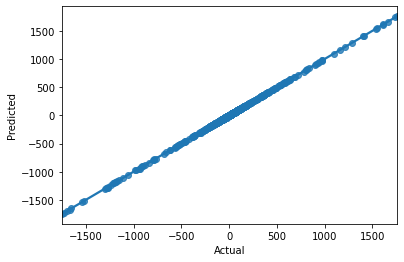

In [23]:
#Plot model of predicted vs actual with seaborn
df_compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
sns.regplot(x='Actual', y='Predicted', data=df_compare);

In [24]:
#Slice dataframe by the name of column, rather than prediction values

In [25]:
#Evaluate model performance using RMSE, R2
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: ', metrics.r2_score(y_test, y_pred))

Root Mean Squared Error: 1.0737404
R2 score:  0.9999632480255677


In [26]:
#Think about something that is more explicity time series data.
#Try -> recurrent neural networks: Good at predicting time series data -> Popular called 'LSTM' long short term memory
#Or Try -> One CNN's looking at things like strings of data, good for picking out patterns

In [27]:
#Try looking for the most relevant series'

In [28]:
#Spend more time thinking about structure of dataset, data cleaning more.
#Consitency in encoding